# Part I Import packages and data

In [1]:
# Basic libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data provessing and machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show


In [3]:
data = pd.read_csv('Churn_Modelling.csv')
# Remove irrelevant features
data = data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Summary statistics
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Defined variables

# Color
DarkBlue = "#24477F"
LightBlue = "#00AEEF"
White = "#FFFFFF"
Black = "#000000"
MediumBlue = "#005EB8"
SkyBlue = "#7EC8E3"
Orange = "#EF7C00"

# Part II Exploratory data analysis

In [6]:
# Check missing value
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

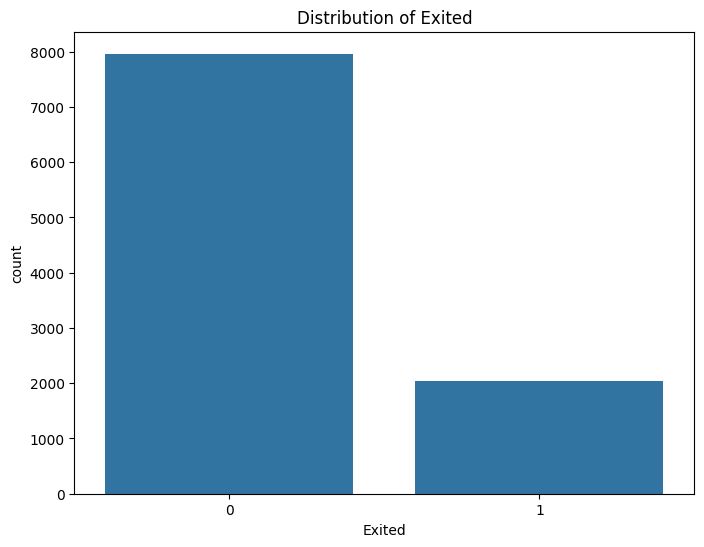

In [7]:
# Distribution of the target variable 'Exited'
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Exited')
plt.show()

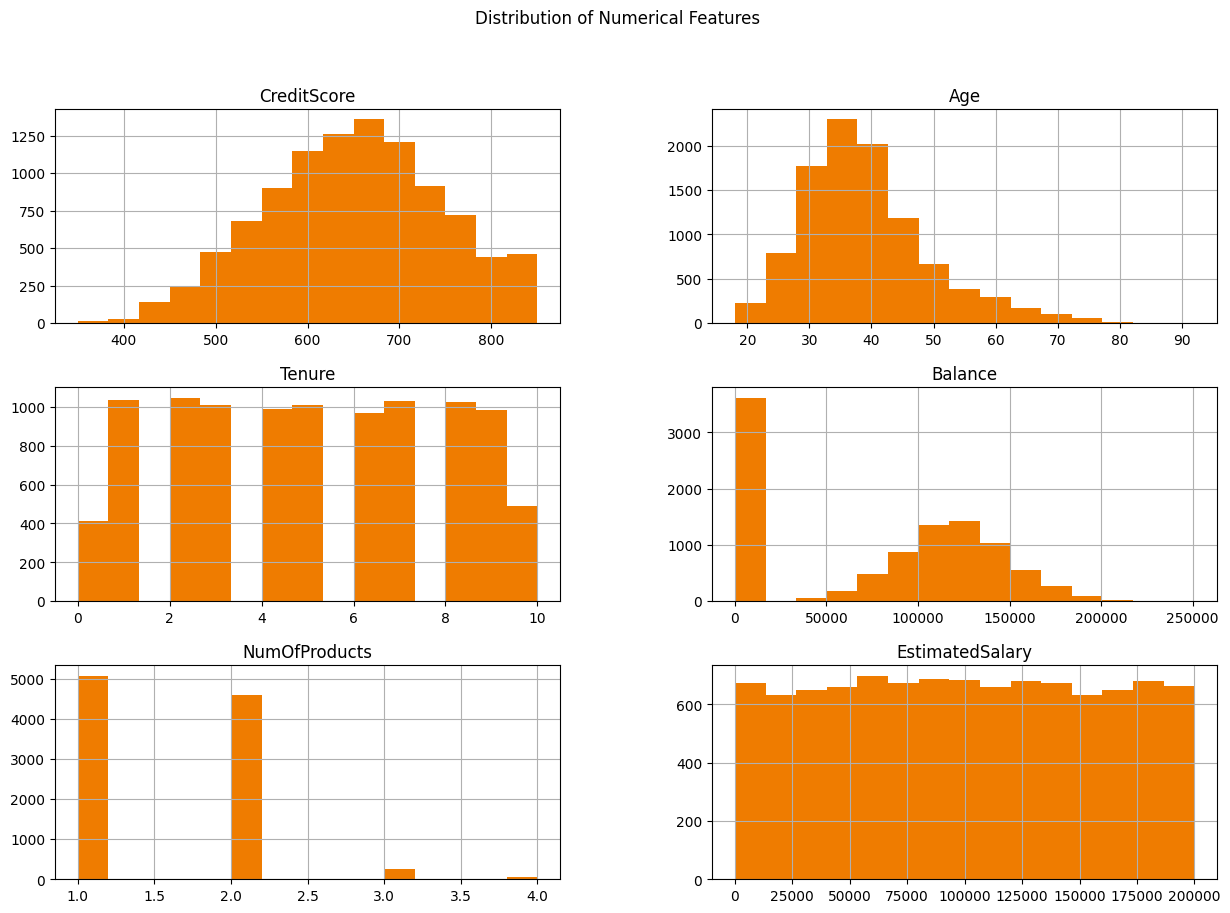

In [8]:
# Distribution of numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 2), color = Orange)
plt.suptitle('Distribution of Numerical Features')
plt.show()

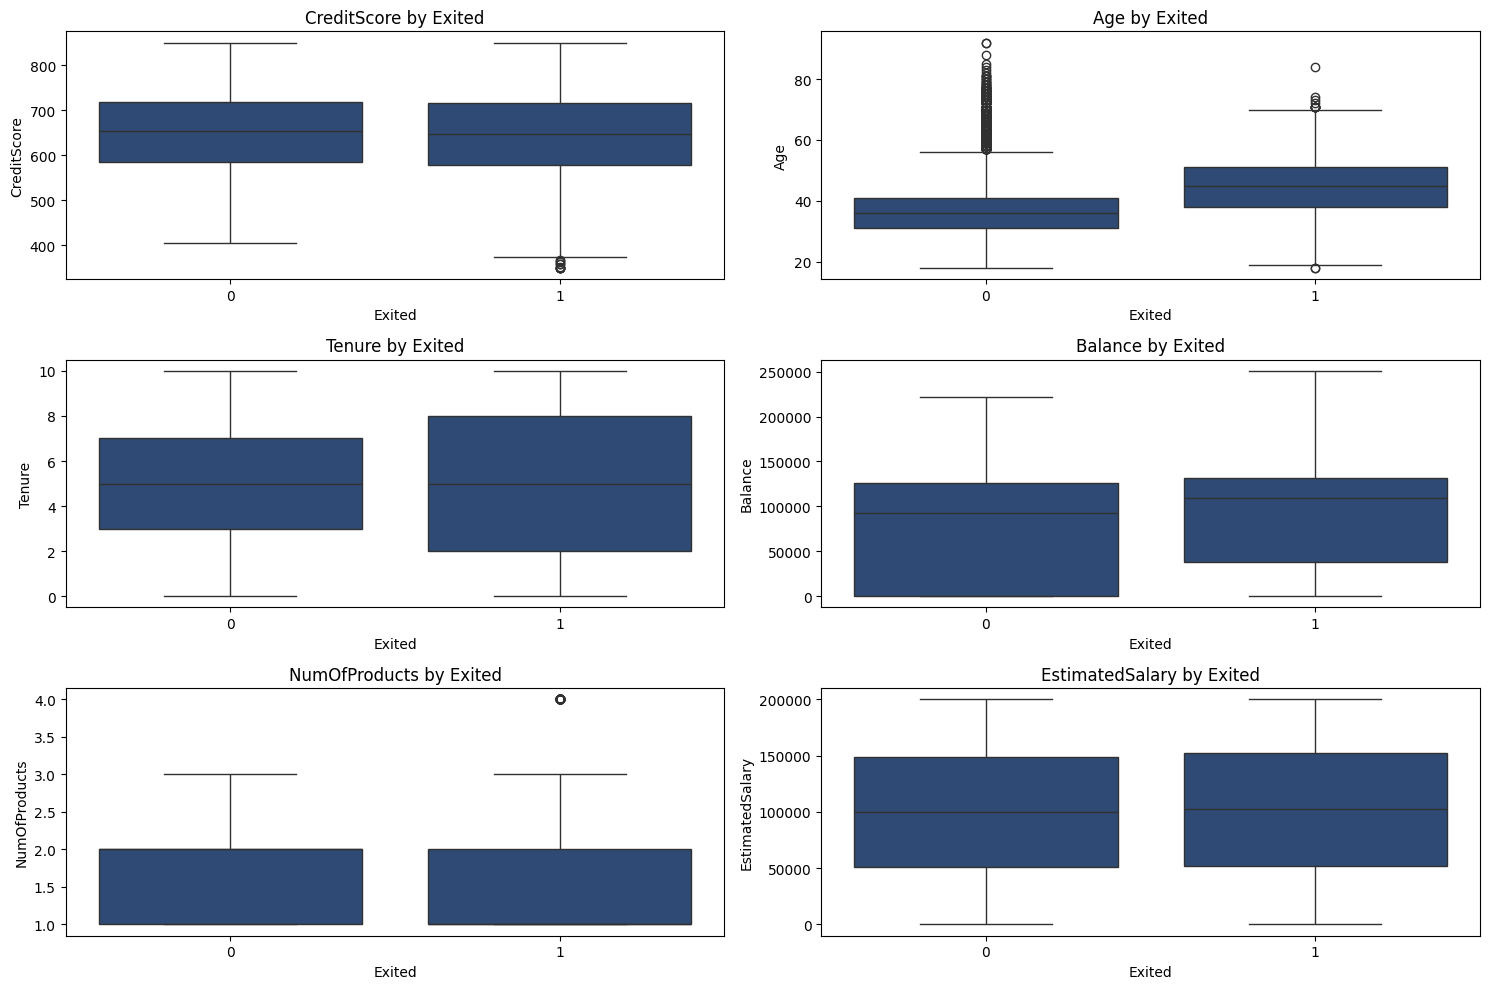

In [9]:
# Boxplots of numerical features by target variable 'Exited'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Exited', y=feature, data=data, color = DarkBlue)
    plt.title(f'{feature} by Exited')
plt.tight_layout()
plt.show()

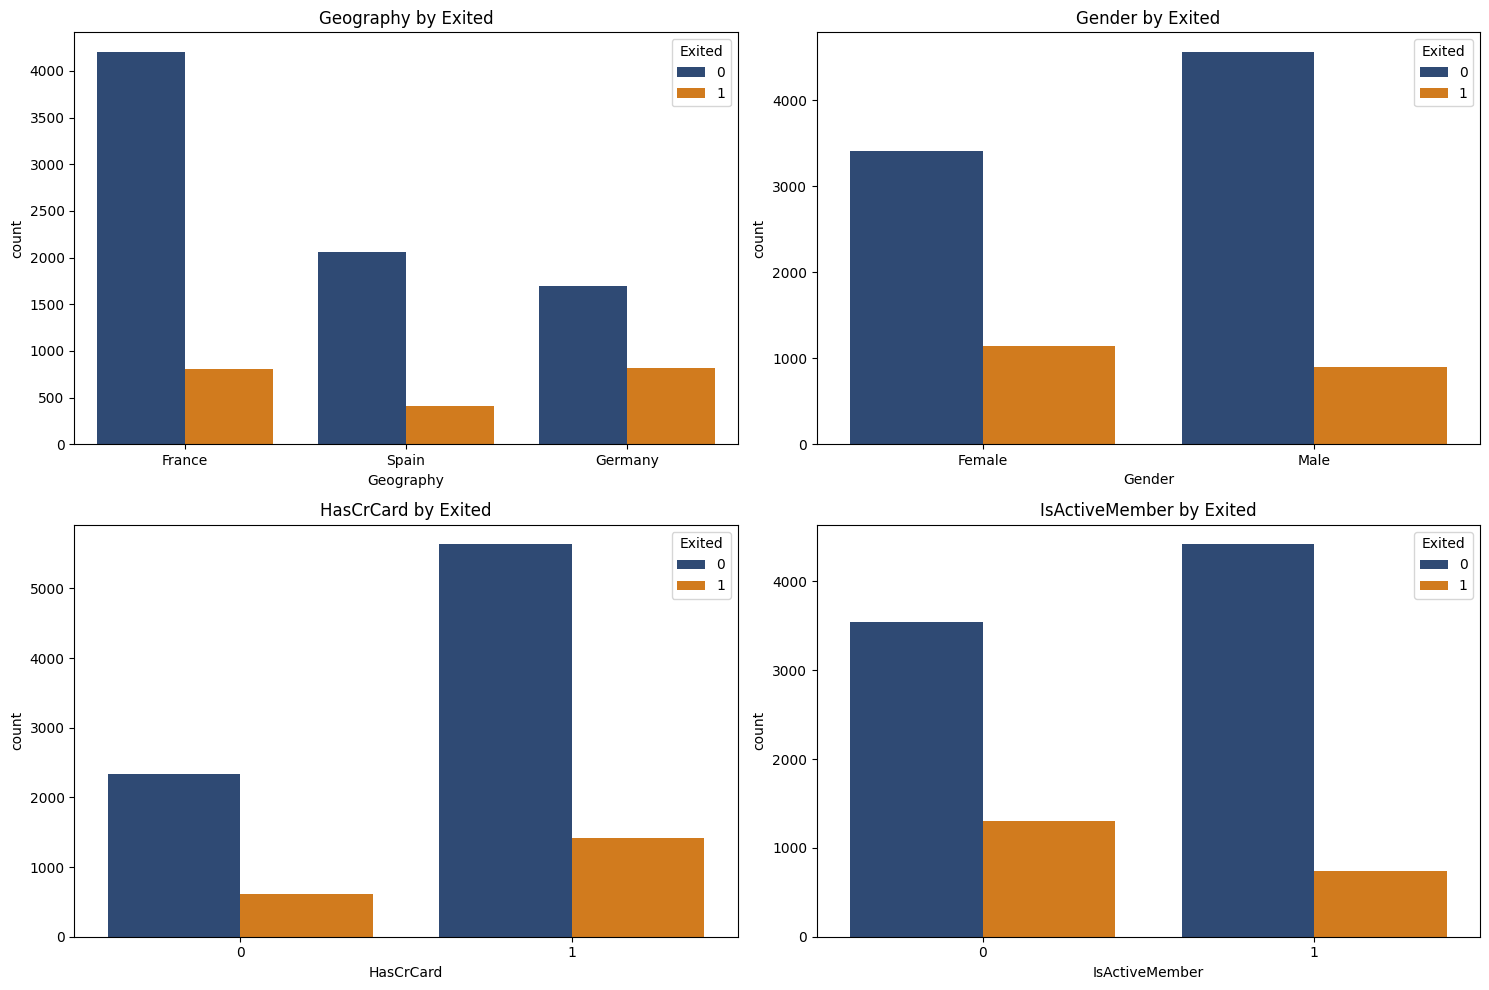

In [10]:
# Countplots of categorical features by target variable 'Exited'
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
plt.figure(figsize=(15, 10))

palette = {
    0: DarkBlue,
    1: Orange
}

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=feature, hue='Exited', data=data, palette = palette)
    plt.title(f'{feature} by Exited')
plt.tight_layout()
plt.show()

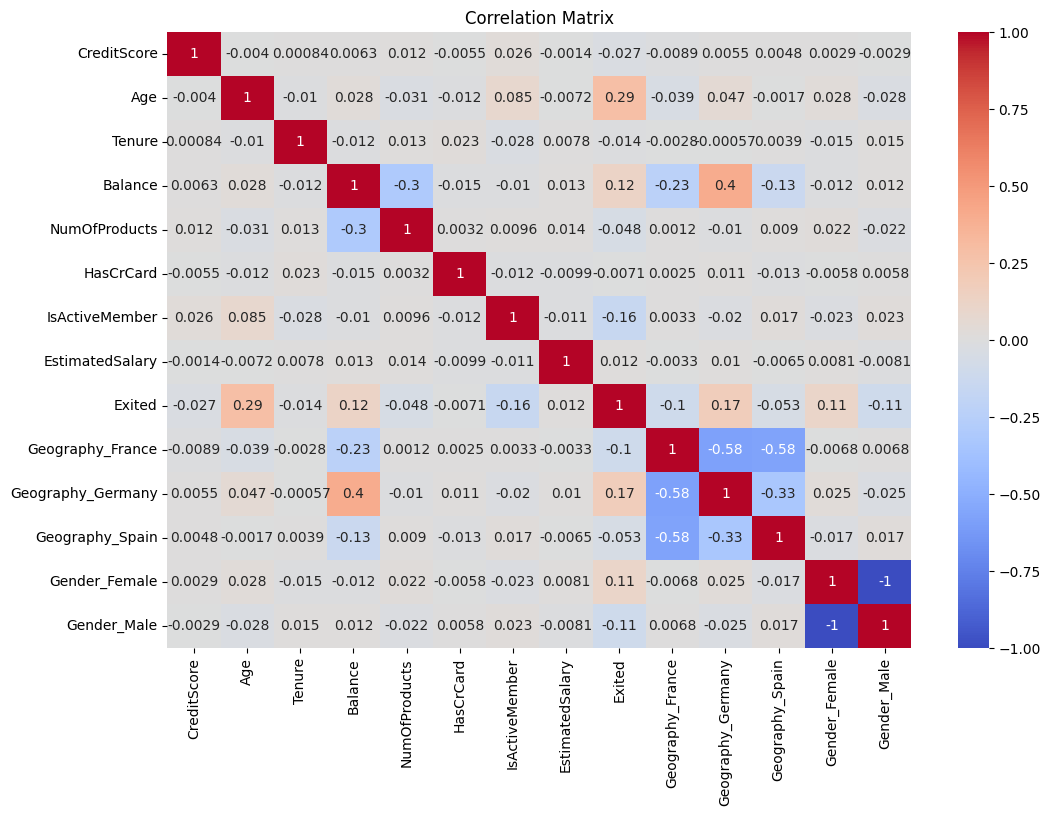

In [11]:
numerical_data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=False)

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Part III Data preprocessing

In [12]:
# Scale numerical features
scaler = StandardScaler()
categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1
3,0.501521,France,Female,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0


In [15]:
# For logistic regression, change drop_first = True
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
categorical_features = [col for col in data.columns if col.startswith('Geography') or col.startswith('Gender')]

In [16]:
# Separate features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

In [17]:
# This way, we have 60% of training, 20% of validation, and 20% of testing. 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Part IV Logistic Regression Model

## Model 1: Base Line Model

In [18]:
# Impute missing values for numeric features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Train Logistic Regression directly on the original training data
logistic_model_base = LogisticRegression(random_state=42)
logistic_model_base.fit(X_train_imputed, y_train)  # No SMOTE applied here

# Evaluate Logistic Regression on Validation Set
y_val_pred_base = logistic_model_base.predict(X_val_imputed)
print("\n--- Base Model (Without SMOTE) ---")
print("Validation (Base Model):")
print(confusion_matrix(y_val, y_val_pred_base))
print(classification_report(y_val, y_val_pred_base))

# Evaluate Logistic Regression on Test Set
y_test_pred_base = logistic_model_base.predict(X_test_imputed)
print("Test (Base Model):")
print(confusion_matrix(y_test, y_test_pred_base))
print(classification_report(y_test, y_test_pred_base))





--- Base Model (Without SMOTE) ---
Validation (Base Model):
[[1557   63]
 [ 304   76]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1620
           1       0.55      0.20      0.29       380

    accuracy                           0.82      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.82      0.78      2000

Test (Base Model):
[[1505   65]
 [ 337   93]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1570
           1       0.59      0.22      0.32       430

    accuracy                           0.80      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.77      0.80      0.76      2000



In [19]:
# Define logistic regression and hyperparameter grid
logistic = LogisticRegression(random_state=42, max_iter=1000)
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.0001, 0.005, 0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear']  # Solver that supports 'l1' and 'l2'
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=logistic,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("\nBest Parameters:", grid_search.best_params_)

# Evaluate best model on Validation Set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val_imputed)
print("\nValidation Set Evaluation (Random Undersampling with Grid Search):")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluate best model on Test Set
y_test_pred = best_model.predict(X_test_imputed)
print("\nTest Set Evaluation (Random Undersampling with Grid Search):")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Validation Set Evaluation (Random Undersampling with Grid Search):
[[1564   56]
 [ 308   72]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1620
           1       0.56      0.19      0.28       380

    accuracy                           0.82      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.82      0.78      2000


Test Set Evaluation (Random Undersampling with Grid Search):
[[1511   59]
 [ 339   91]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1570
           1       0.61      0.21      0.31       430

    accuracy                           0.80      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.77      0.80      0.76      2000



## Model 2: Random Undersampling Model

In [20]:
### RANDOM UNDERSAMPLING ###
print("\n--- Random Undersampling ---")
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_imputed, y_train)

# Train Logistic Regression on Undersampled Data
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_rus, y_train_rus)

# Evaluate Logistic Regression on Validation Set
y_val_pred_rus = logistic_model.predict(X_val_imputed)
print("Validation (Random Undersampling):")
print(confusion_matrix(y_val, y_val_pred_rus))
print(classification_report(y_val, y_val_pred_rus))

# Evaluate Logistic Regression on Test Set
y_test_pred_rus = logistic_model.predict(X_test_imputed)
print("Test (Random Undersampling):")
print(confusion_matrix(y_test, y_test_pred_rus))
print(classification_report(y_test, y_test_pred_rus))


--- Random Undersampling ---
Validation (Random Undersampling):
[[1119  501]
 [ 116  264]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1620
           1       0.35      0.69      0.46       380

    accuracy                           0.69      2000
   macro avg       0.63      0.69      0.62      2000
weighted avg       0.80      0.69      0.72      2000

Test (Random Undersampling):
[[1096  474]
 [ 120  310]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1570
           1       0.40      0.72      0.51       430

    accuracy                           0.70      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.79      0.70      0.73      2000



In [21]:
### RANDOM UNDERSAMPLING WITH GRID SEARCH ###
print("\n--- Random Undersampling with Grid Search ---")
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_imputed, y_train)

# Define logistic regression and hyperparameter grid
logistic = LogisticRegression(random_state=42, max_iter=1000)
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.0001, 0.005, 0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear']  # Solver that supports 'l1' and 'l2'
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=logistic,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_rus, y_train_rus)

# Best hyperparameters
print("\nBest Parameters:", grid_search.best_params_)

# Evaluate best model on Validation Set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val_imputed)
print("\nValidation Set Evaluation (Random Undersampling with Grid Search):")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluate best model on Test Set
y_test_pred = best_model.predict(X_test_imputed)
print("\nTest Set Evaluation (Random Undersampling with Grid Search):")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


--- Random Undersampling with Grid Search ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Validation Set Evaluation (Random Undersampling with Grid Search):
[[1149  471]
 [ 128  252]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1620
           1       0.35      0.66      0.46       380

    accuracy                           0.70      2000
   macro avg       0.62      0.69      0.63      2000
weighted avg       0.80      0.70      0.73      2000


Test Set Evaluation (Random Undersampling with Grid Search):
[[1121  449]
 [ 133  297]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1570
           1       0.40      0.69      0.51       430

    accuracy                           0.71      2000
   macro avg       0.65      0.70      0.65      2000
weighted avg       0.79      0.71      

## Model 3: SMOTE

In [22]:
### SMOTE ###
print("\n--- SMOTE ---")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

# Train Logistic Regression on Undersampled Data
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_smote, y_train_smote)

# Evaluate Logistic Regression on Validation Set
y_val_pred_smote = logistic_model.predict(X_val_imputed)
print("Validation (SMOTE):")
print(confusion_matrix(y_val, y_val_pred_smote))
print(classification_report(y_val, y_val_pred_smote))

# Evaluate Logistic Regression on Test Set
y_test_pred_smote = logistic_model.predict(X_test_imputed)
print("Test (SMOTE):")
print(confusion_matrix(y_test, y_test_pred_smote))
print(classification_report(y_test, y_test_pred_smote))


--- SMOTE ---
Validation (SMOTE):
[[1129  491]
 [ 118  262]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1620
           1       0.35      0.69      0.46       380

    accuracy                           0.70      2000
   macro avg       0.63      0.69      0.63      2000
weighted avg       0.80      0.70      0.73      2000

Test (SMOTE):
[[1113  457]
 [ 123  307]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1570
           1       0.40      0.71      0.51       430

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.79      0.71      0.73      2000



In [23]:
### SMOTE WITH GRID SEARCH ###
print("\n--- SMOTE with Grid Search ---")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

# Define logistic regression and hyperparameter grid
logistic = LogisticRegression(random_state=42, max_iter=1000)
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.0001, 0.005, 0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear']  # Solver that supports 'l1' and 'l2'
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=logistic,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters
print("\nBest Parameters:", grid_search.best_params_)

# Evaluate best model on Validation Set
best_model_smote = grid_search.best_estimator_
y_val_pred = best_model_smote.predict(X_val_imputed)
print("\nValidation Set Evaluation (SMOTE with Grid Search):")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluate best model on Test Set
y_test_pred = best_model_smote.predict(X_test_imputed)
print("\nTest Set Evaluation (SMOTE with Grid Search):")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


--- SMOTE with Grid Search ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

Validation Set Evaluation (SMOTE with Grid Search):
[[1155  465]
 [ 130  250]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1620
           1       0.35      0.66      0.46       380

    accuracy                           0.70      2000
   macro avg       0.62      0.69      0.63      2000
weighted avg       0.79      0.70      0.73      2000


Test Set Evaluation (SMOTE with Grid Search):
[[1138  432]
 [ 133  297]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1570
           1       0.41      0.69      0.51       430

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.79      0.72      0.74      2000



In [24]:
# Access coefficients and feature names
coefficients = best_model_smote.coef_[0]  # Coefficients for the trained model
intercept = best_model_smote.intercept_[0]  # Intercept term

# Create a DataFrame for easy visualization
coeff_df = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Logistic Regression Coefficients:")
print(coeff_df)

# Save to CSV if needed
coeff_df.to_csv("logistic_regression_coefficients.csv", index=False)


Logistic Regression Coefficients:
              Feature  Coefficient
1                 Age     0.514055
8   Geography_Germany     0.251973
3             Balance     0.201687
5           HasCrCard     0.023888
7     EstimatedSalary     0.010668
0         CreditScore    -0.046767
2              Tenure    -0.048182
4       NumOfProducts    -0.049980
9     Geography_Spain    -0.065742
10        Gender_Male    -0.176472
6      IsActiveMember    -0.296344


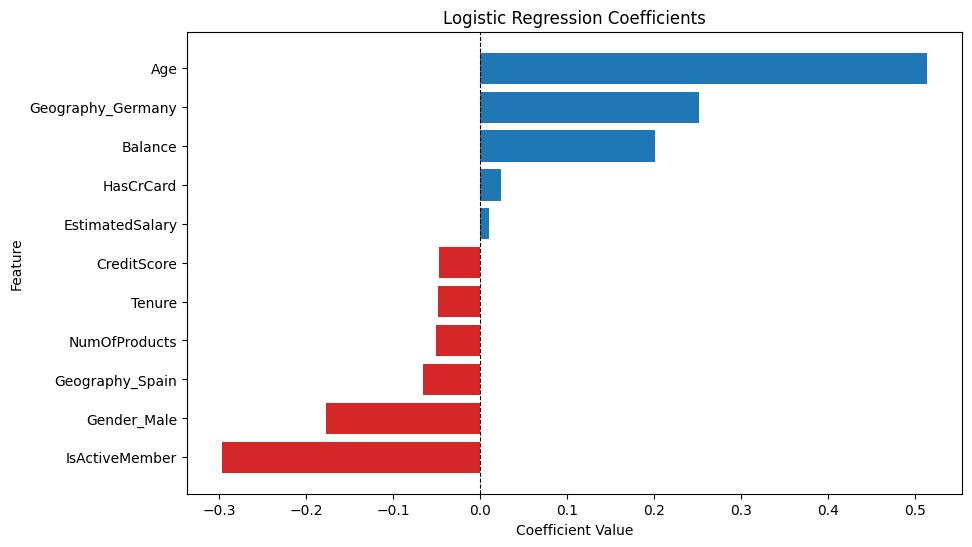

In [25]:
import matplotlib.pyplot as plt

# Sort coefficients by magnitude
coeff_df_sorted = coeff_df.sort_values(by='Coefficient', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(coeff_df_sorted['Feature'], coeff_df_sorted['Coefficient'], color=['#1f77b4' if x > 0 else '#d62728' for x in coeff_df_sorted['Coefficient']])
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


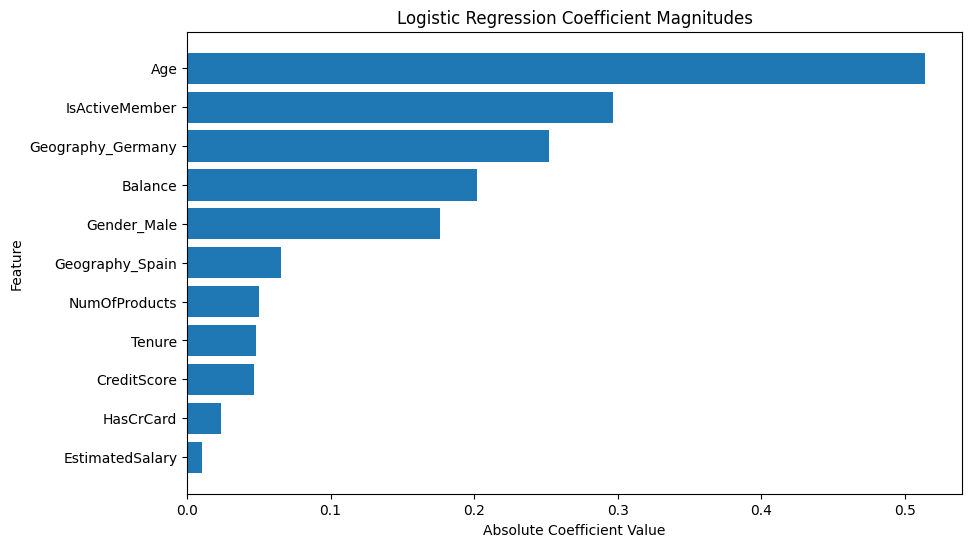

In [26]:
# Add a column for absolute coefficients
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()

# Sort by absolute value
coeff_df_sorted_abs = coeff_df.sort_values(by='Abs_Coefficient', ascending=True)

# Horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(coeff_df_sorted_abs['Feature'], coeff_df_sorted_abs['Abs_Coefficient'], color='#1f77b4')
plt.title('Logistic Regression Coefficient Magnitudes')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()


# Part V - SHAP Value

Global SHAP Values (Validation Set):
              Feature  Mean Absolute SHAP
1                 Age            0.429721
3             Balance            0.182525
6      IsActiveMember            0.148091
8   Geography_Germany            0.101902
10        Gender_Male            0.087782
4       NumOfProducts            0.046709
2              Tenure            0.041711
0         CreditScore            0.037313
9     Geography_Spain            0.023909
5           HasCrCard            0.010357
7     EstimatedSalary            0.009395
Global SHAP Interpretation (Validation Set):


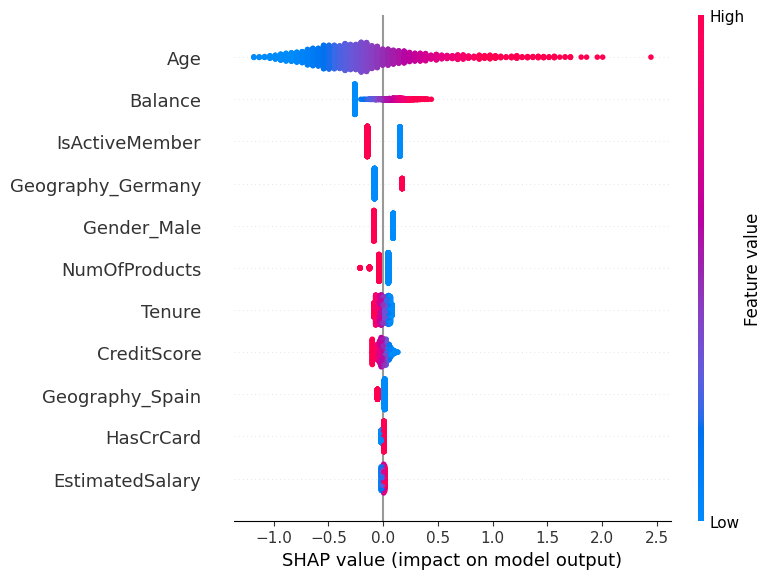

Global SHAP Interpretation (Bar Chart):


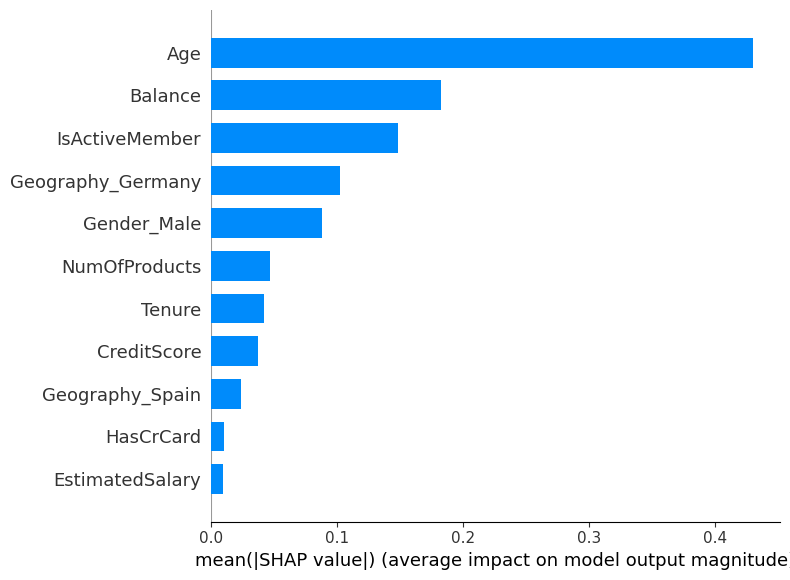

Local SHAP Values for First Test Instance:
                             Feature  SHAP Value  Feature Value
CreditScore              CreditScore   -0.019394       0.367013
Age                              Age   -0.248887      -0.183251
Tenure                        Tenure   -0.066998       1.378686
Balance                      Balance    0.177113       0.930770
NumOfProducts          NumOfProducts    0.048121      -0.911583
HasCrCard                  HasCrCard    0.008157       1.000000
IsActiveMember        IsActiveMember    0.152912       0.000000
EstimatedSalary      EstimatedSalary   -0.013426      -1.260596
Geography_Germany  Geography_Germany   -0.077817       0.000000
Geography_Spain      Geography_Spain    0.015018       0.000000
Gender_Male              Gender_Male   -0.083605       1.000000
Local SHAP Interpretation for the first test instance:


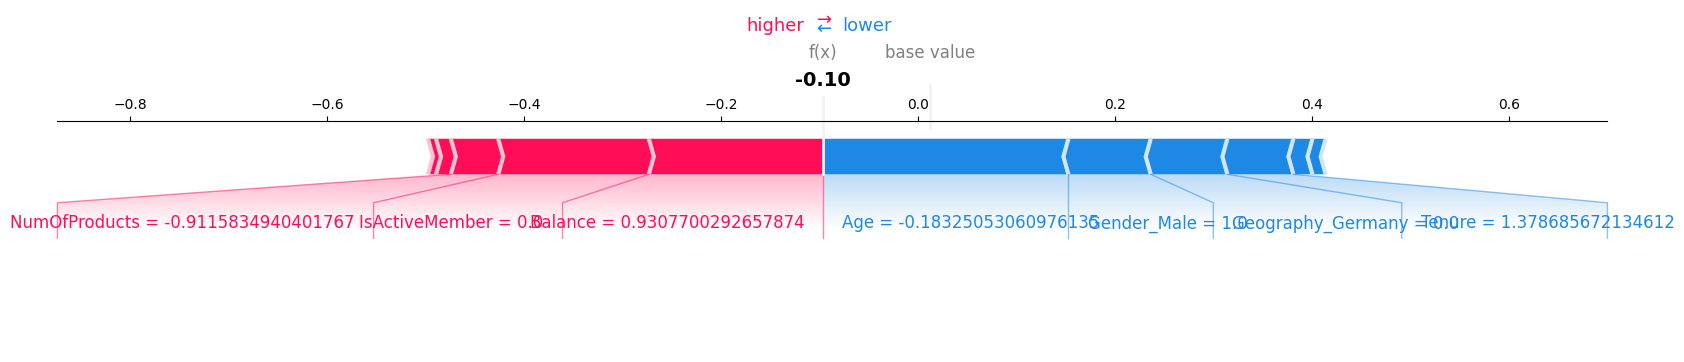

In [27]:
import shap
shap.initjs()

# Step 1: Create SHAP Explainer
# Use the trained logistic regression model and the training data
explainer = shap.Explainer(best_model_smote, X_train_smote)

# Step 2: Compute SHAP values for validation and test sets
shap_values_val = explainer(X_val_imputed)
shap_values_test = explainer(X_test_imputed)


# Step 3: Global SHAP Value

# Global SHAP values (mean absolute values for validation set)
global_shap_val = pd.DataFrame({
    'Feature': X_val_imputed.columns,
    'Mean Absolute SHAP': np.abs(shap_values_val.values).mean(axis=0)
}).sort_values(by='Mean Absolute SHAP', ascending=False)

print("Global SHAP Values (Validation Set):")
print(global_shap_val)

# Optional: Save to CSV
global_shap_val.to_csv("global_shap_values.csv", index=False)


print("Global SHAP Interpretation (Validation Set):")
shap.summary_plot(shap_values_val, X_val_imputed)

print("Global SHAP Interpretation (Bar Chart):")
shap.summary_plot(shap_values_val, X_val_imputed, plot_type="bar")



# Step 4: Local Interpretation
# Local SHAP values for the first instance in the test set
local_shap_test = pd.DataFrame({
    'Feature': X_test_imputed.columns,
    'SHAP Value': shap_values_test.values[0],  # SHAP values for the first instance
    'Feature Value': X_test_imputed.iloc[0]
})

print("Local SHAP Values for First Test Instance:")
print(local_shap_test)

# Optional: Save to CSV
local_shap_test.to_csv("local_shap_values_instance1.csv", index=False)


print("Local SHAP Interpretation for the first test instance:")
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values_test.values[0],
    features=X_test_imputed.iloc[0],
    feature_names=X_test_imputed.columns.tolist(),
    matplotlib=True  # Use static Matplotlib visualization if necessary
)
